In [1]:
import sys
import os

from tsne_umap_diagnostics.tsne_diagnostics import show_P_heatmap, show_Q_heatmap, calculate_P_matrix, calculate_Q_matrix
from tsne_umap_diagnostics.umap_diagnostics import show_V_heatmap, show_W_heatmap, calculate_W_matrix
from tsne_umap_diagnostics.general_diagnostics import distance_fit_plot, matrix_fit_plot_from_matrices, matrix_fit_plot, diagnostic_plots

sys.path.append(os.path.abspath('..'))  # or path to your project root

In [2]:
import sklearn.datasets as datasets
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

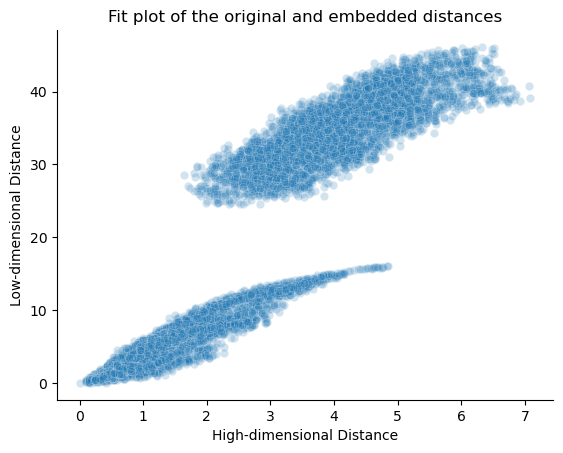

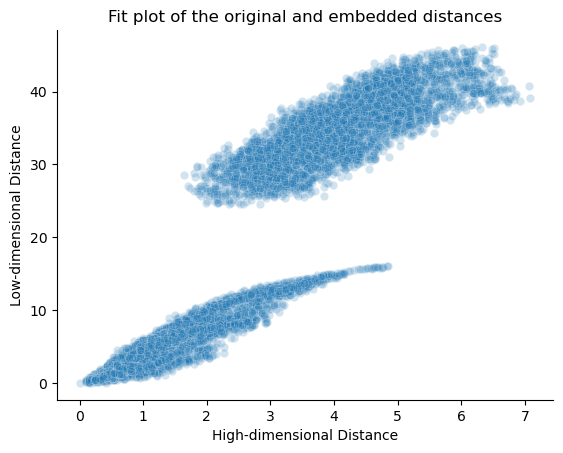

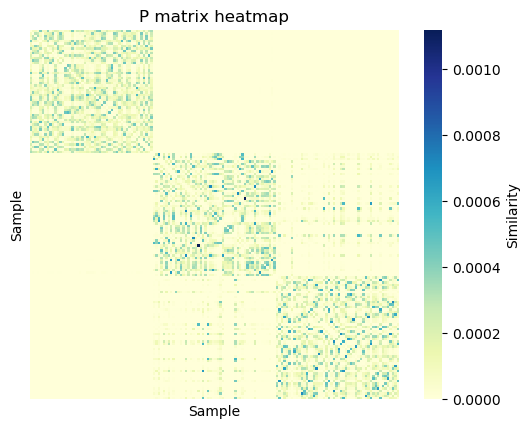

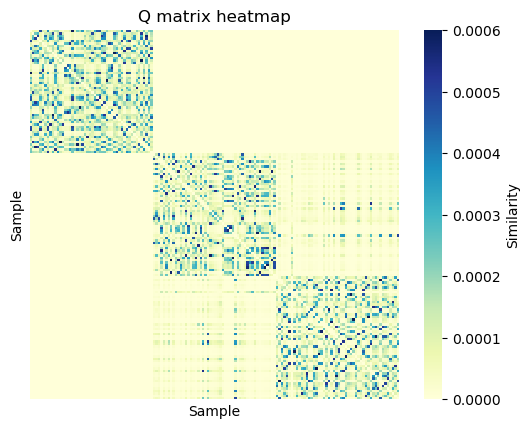

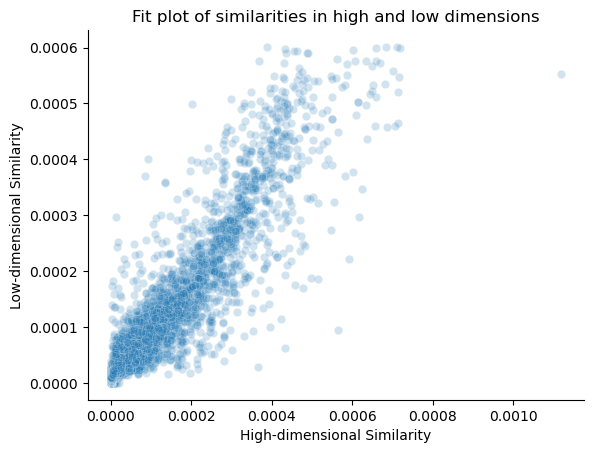

In [3]:
iris = datasets.load_iris()
tsne_reduced = TSNE(perplexity=30).fit_transform(iris.data)

fig = distance_fit_plot(X_original=iris.data, X_embedded=tsne_reduced)
plt.show()

hd_dist = metrics.pairwise_distances(iris.data, metric='euclidean')
ld_dist = metrics.pairwise_distances(tsne_reduced, metric='euclidean')
fig = distance_fit_plot(distances_original=hd_dist, distances_embedded=ld_dist)
plt.show()

fig = show_P_heatmap(X_original=iris.data)
plt.show()

fig = show_Q_heatmap(X_embedded=tsne_reduced)
plt.show()

P = calculate_P_matrix(X_original=iris.data)
Q = calculate_Q_matrix(X_embedded=tsne_reduced)
fig = matrix_fit_plot_from_matrices(P, Q)

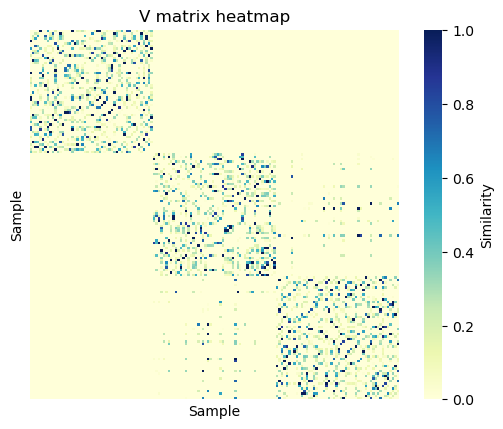

C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


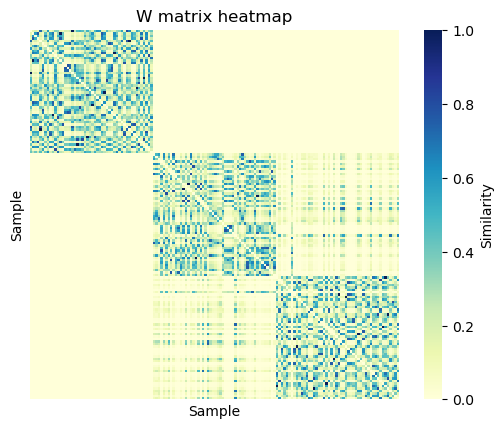

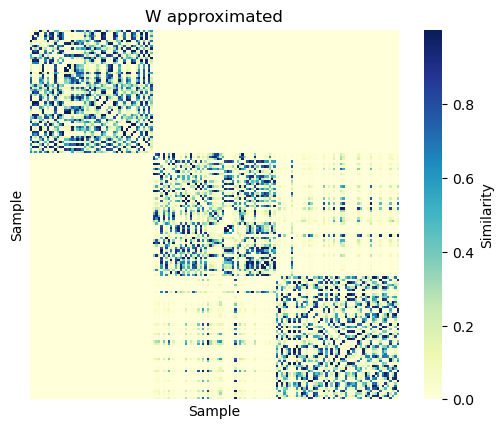

In [4]:
fig = show_V_heatmap(X_original=iris.data)
plt.show()

model = umap.UMAP(n_neighbors=30, min_dist=0.2)
umap_reduced = model.fit_transform(iris.data)

fig = show_W_heatmap(X_embedded=umap_reduced)
plt.show()

fig = show_W_heatmap(X_embedded=umap_reduced, use_approximation=True, title='W approximated')
plt.show()

Comparing exact and approximate W matrices

In [5]:
Wexact = calculate_W_matrix(X_embedded=umap_reduced)
Wapprox = calculate_W_matrix(X_embedded=umap_reduced, use_approximation=True)

# Mean Absolute Error
mae = np.mean(np.abs(Wapprox - Wexact))
print(mae)
# Variance of difference
var = np.var(Wapprox - Wexact)
print(var)


0.042675834
0.008058389


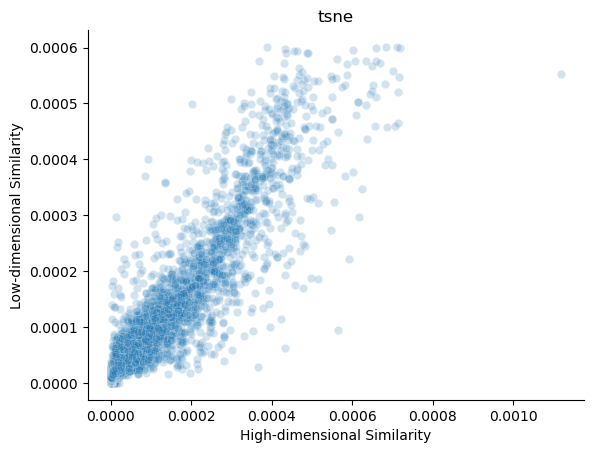

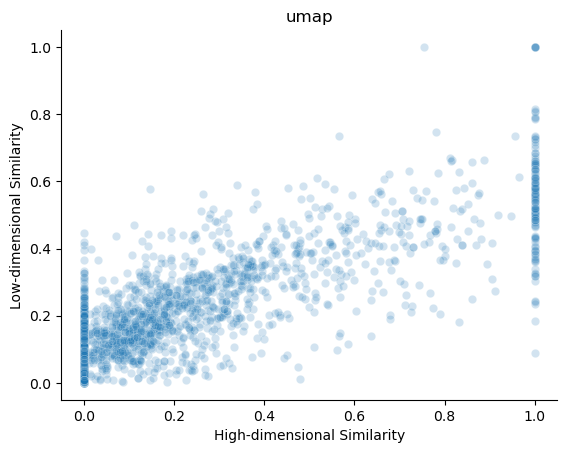

In [6]:
fig = matrix_fit_plot(X_original=iris.data, X_embedded=tsne_reduced, method='tsne', title='tsne')
plt.show()

fig = matrix_fit_plot(X_original=iris.data, X_embedded=tsne_reduced, method='umap', title='umap')

C:\Users\Sendit\AppData\Local\Temp\ipykernel_14480\941038643.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


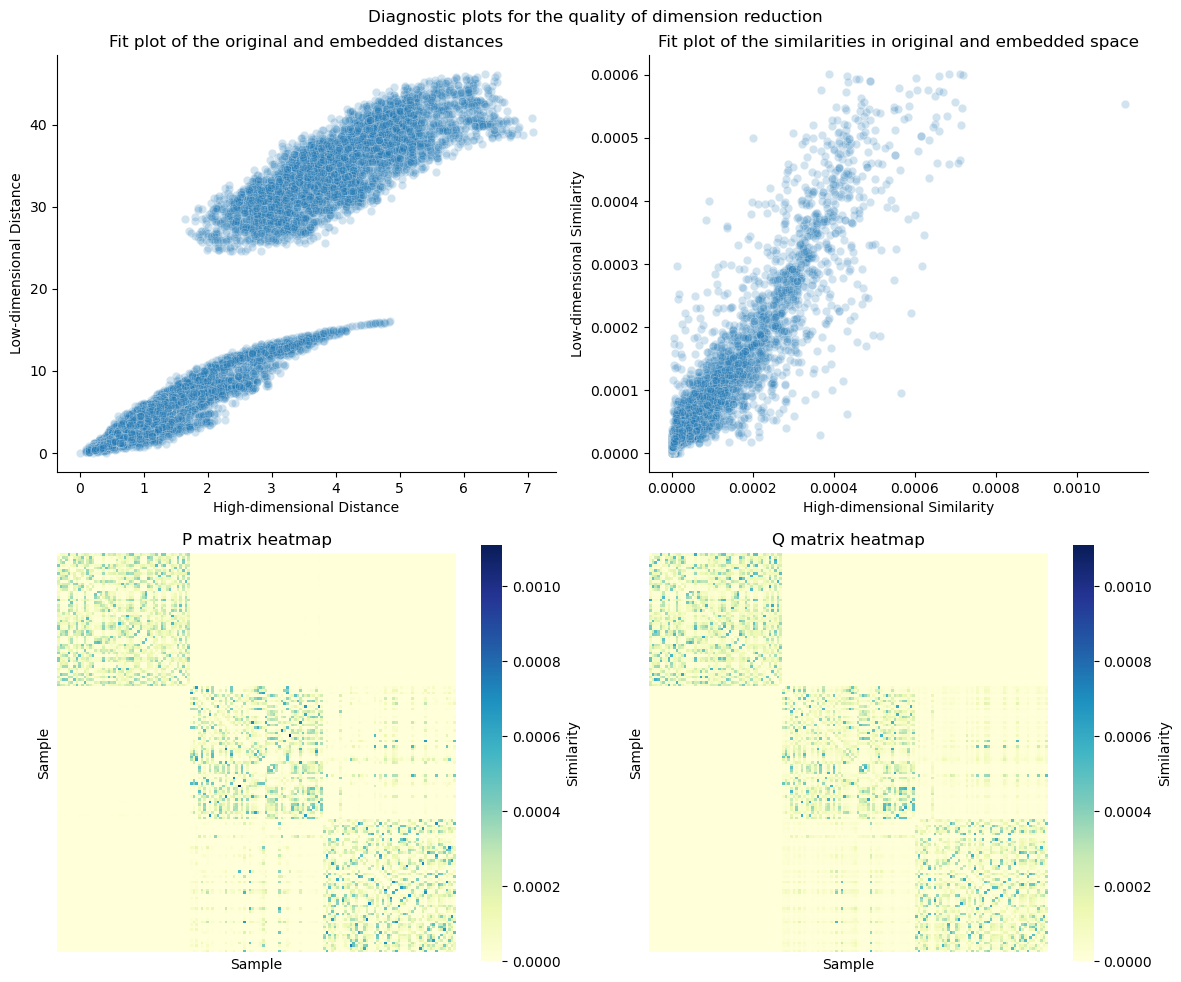

In [7]:
fig, _ = diagnostic_plots(X_original=iris.data, X_embedded=tsne_reduced, method='tsne')
fig.show()
